# Automatic Jupyter Notebook : MyApp
This is an auto-generated notebook generated using the classifAI DSL on : 22/01/2023 11:30:23

## Selection of data

In [108]:
import os
import numpy as np
from PIL import Image

In [109]:
X = []
Y = []
classes = ['0', '1', '2', '3']
classes_count = {'0': 1000, '1': 1000, '2': 1000, '3': 1000}
for class_ in classes:
	count = 0
	for file in os.listdir(f'input_data/' + class_):
		if count == classes_count[class_]:
			break
		X.append(np.array(Image.open(f'input_data/' + class_ + '/' + file)))
		Y.append(class_)
		count += 1
X=np.array(X)
Y=np.array(Y)
print("X shape :",X.shape)
print("Y shape :",Y.shape)

X shape : (4000, 28, 28)
Y shape : (4000,)


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Preprocessing of data

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

## Transformation of data

### Normalization of data

In [112]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train / 255
X_test = X_test / 255
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 28, 28)
X test shape : (800, 28, 28)


### Reshaping of data

In [113]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("X train shape :",X_train.shape)
print("X train shape :",X_test.shape)

X train shape : (3200, 28, 28, 1)
X train shape : (800, 28, 28, 1)


## Data Mining

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Keeping track of the models and the metrics

In [115]:
models_metrics = dict()

### Classifier : rank 1 - number 1

Reshaping the data of this classifier

In [116]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 28, 28, 1)
X test shape : (800, 28, 28, 1)


Creating the model

In [117]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

Training and evaluating the model

In [118]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-1"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 7s 52ms/step - loss: 1.5136 - accuracy: 0.2894
Epoch 2/10
100/100 [==============================] - 6s 64ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 3/10
100/100 [==============================] - 9s 88ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 4/10
100/100 [==============================] - 7s 69ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 5/10
100/100 [==============================] - 6s 63ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 6/10
100/100 [==============================] - 6s 62ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 7/10
100/100 [==============================] - 7s 74ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 8/10
100/100 [==============================] - 7s 67ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 9/10
100/100 [==============================] - 7s 68ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 10/10
25/25 [==============================] - 1s 23ms/step - loss: 1.3863 - accuracy

### Classifier : rank 2 - number 1

Flattening the data of this classifier

In [119]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [120]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 4)                 516       
                                                                 
Total params: 100,996
Trainable params: 100,996
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [121]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["2-1"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 6ms/step - loss: 1.5005 - accuracy: 0.2822
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3508 - accuracy: 0.2781
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3490 - accuracy: 0.2794
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3430 - accuracy: 0.2837
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3334 - accuracy: 0.2906
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3278 - accuracy: 0.2947
Epoch 7/10
100/100 [==============================] - 1s 9ms/step - loss: 1.4382 - accuracy: 0.2887
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3798 - accuracy: 0.2575
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3798 - accuracy: 0.2575
Epoch 10/10
25/25 [==============================] - 1s 4ms/step - loss: 1.3811 - accuracy: 0.2425
L

## Comparison of classifiers

### Importing libraries

In [122]:
import matplotlib.pyplot as plt

### Plotting the metrics

#### Plot of the accuracy

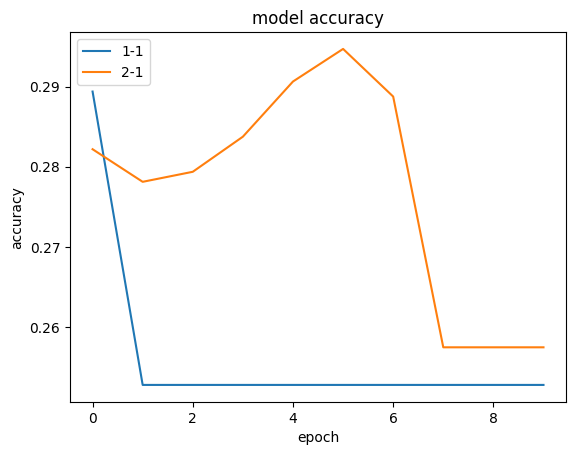

In [123]:
# Plot accuracy of the classifiers
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

#### Plot of the loss

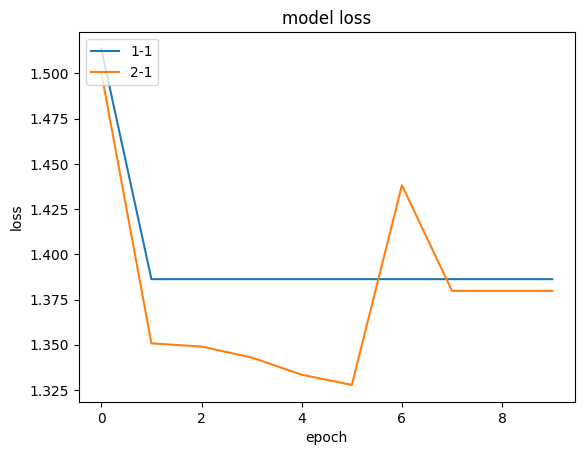

In [124]:
# Plot loss of the classifiers
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

## Deploying the best model

### Finding the best model according to the accuracy

In [125]:
best_model = None        
best_accuracy = 0        
for key, value in models_metrics.items():            
	accuracy = value[1][1]            
	if accuracy > best_accuracy:                
		best_accuracy = accuracy                
		best_model = value[2]        
print(f"Best model accuracy: {best_accuracy}")

Best model accuracy: 0.24250000715255737


### Saving the best model

In [126]:
best_model.save("../prediction-app/model/model.h5")        
print("The best model has been saved in the directory ../prediction-app/model/model.h5")

The best model has been saved in the directory ../prediction-app/model/model.h5


### Setting the name of the application

In [127]:
with open("../prediction-app/.env", "w") as file:        
	file.write("APP_NAME=\"My Prediction App\"")

### Instructions for running the application

1. Open the terminal and go to the directory ../prediction-app

2. Run the command: steamlit run app.py

3. Open the browser and go to the address: http://localhost:8501